In [1]:
# 1. 문맥을 이용해 모델만들기

In [2]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

In [56]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text]) # 텍스트 리스트를 만들어 넣어야 함
encoded = t.texts_to_sequences([text])[0]
encoded
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [57]:
t.texts_to_sequences(['곱다'])[0]

[11]

경마장에 있는 (0,0,0,0,2,3)
경마장에 있는 말이 (0,0,0,2,3,1)
경마장에 있는 말이 뛰고(0,0,2,3,1,4)

In [58]:
t.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])[0]

[2, 3, 1, 4, 5]

In [59]:
sequences=[]
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    print('원래문장: ',line)
    print('encoded 이후:',encoded)

원래문장:  경마장에 있는 말이 뛰고 있다
encoded 이후: [2, 3, 1, 4, 5]
원래문장:  그의 말이 법이다
encoded 이후: [6, 1, 7]
원래문장:  가는 말이 고와야 오는 말이 곱다
encoded 이후: [8, 1, 9, 10, 1, 11]


In [60]:
#
sequences=[]
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
#    print('원래문장: ',line)
#    print('encoded 이후:',encoded)
    for i in range(0,len(encoded)-1):
        for j in range(i+2,len(encoded)+1):
            sequences.append(encoded[i:j])
for sequence in sequences:
    print('[',end='')
    for word_seq in sequence:
        for key, value in t.word_index.items():
            if value == word_seq:
                print("{}:{}".format(value,key),end=" ")
    print("\n")

[2:경마장에 3:있는 

[2:경마장에 3:있는 1:말이 

[2:경마장에 3:있는 1:말이 4:뛰고 

[2:경마장에 3:있는 1:말이 4:뛰고 5:있다 

[3:있는 1:말이 

[3:있는 1:말이 4:뛰고 

[3:있는 1:말이 4:뛰고 5:있다 

[1:말이 4:뛰고 

[1:말이 4:뛰고 5:있다 

[4:뛰고 5:있다 

[6:그의 1:말이 

[6:그의 1:말이 7:법이다 

[1:말이 7:법이다 

[8:가는 1:말이 

[8:가는 1:말이 9:고와야 

[8:가는 1:말이 9:고와야 10:오는 

[8:가는 1:말이 9:고와야 10:오는 1:말이 

[8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 

[1:말이 9:고와야 

[1:말이 9:고와야 10:오는 

[1:말이 9:고와야 10:오는 1:말이 

[1:말이 9:고와야 10:오는 1:말이 11:곱다 

[9:고와야 10:오는 

[9:고와야 10:오는 1:말이 

[9:고와야 10:오는 1:말이 11:곱다 

[10:오는 1:말이 

[10:오는 1:말이 11:곱다 

[1:말이 11:곱다 



In [61]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [3, 1],
 [3, 1, 4],
 [3, 1, 4, 5],
 [1, 4],
 [1, 4, 5],
 [4, 5],
 [6, 1],
 [6, 1, 7],
 [1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11],
 [1, 9],
 [1, 9, 10],
 [1, 9, 10, 1],
 [1, 9, 10, 1, 11],
 [9, 10],
 [9, 10, 1],
 [9, 10, 1, 11],
 [10, 1],
 [10, 1, 11],
 [1, 11]]

In [62]:
print([len(s) for s in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [63]:
# sequences 에 제일 많은 단어가 들어있는 갯수
maxlen = max([len(s) for s in sequences])
maxlen

6

In [64]:
type(sequences)

list

In [65]:
# sequences 를 훈련가능한 데이터로 만들기
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences=sequences,
                         maxlen=maxlen,
                         padding='pre')
type(sequences),len(sequences),sequences

(numpy.ndarray,
 28,
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [66]:
# 독립변수(X)와 종속변수(Y) 분리
X = sequences[:, :-1]
Y = sequences[:, -1]
Y

array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
       11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11])

In [67]:
vocab_size = len(t.word_index)+1
vocab_size

12

In [68]:

# Y 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, num_classes=vocab_size)
Y


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [69]:
X.shape[1]

5

In [70]:
# RNN 모델 생성, 학습과정 설정, 학습시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
# 희소행렬로 변환
model.add(Embedding(vocab_size,12,input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size,activation='softmax'))

# 모델 학습과정 설정
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

#학습시키기
hist = model.fit(X,Y,epochs=300,verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.5006 - accuracy: 0.0357
Epoch 2/300
1/1 - 0s - loss: 2.4881 - accuracy: 0.0357
Epoch 3/300
1/1 - 0s - loss: 2.4760 - accuracy: 0.0357
Epoch 4/300
1/1 - 0s - loss: 2.4640 - accuracy: 0.0714
Epoch 5/300
1/1 - 0s - loss: 2.4521 - accuracy: 0.1429
Epoch 6/300
1/1 - 0s - loss: 2.4403 - accuracy: 0.1429
Epoch 7/300
1/1 - 0s - loss: 2.4284 - accuracy: 0.2500
Epoch 8/300
1/1 - 0s - loss: 2.4163 - accuracy: 0.3571
Epoch 9/300
1/1 - 0s - loss: 2.4040 - accuracy: 0.3929
Epoch 10/300
1/1 - 0s - loss: 2.3914 - accuracy: 0.3929
Epoch 11/300
1/1 - 0s - loss: 2.3784 - accuracy: 0.3929
Epoch 12/300
1/1 - 0s - loss: 2.3650 - accuracy: 0.3929
Epoch 13/300
1/1 - 0s - loss: 2.3510 - accuracy: 0.3929
Epoch 14/300
1/1 - 0s - loss: 2.3364 - accuracy: 0.4643
Epoch 15/300
1/1 - 0s - loss: 2.3212 - accuracy: 0.5000
Epoch 16/300
1/1 - 0s - loss: 2.3053 - accuracy: 0.5357
Epoch 17/300
1/1 - 0s - loss: 2.2888 - accuracy: 0.5357
Epoch 18/300
1/1 - 0s - loss: 2.2715 - accuracy: 0.5357
E

Epoch 147/300
1/1 - 0s - loss: 0.6492 - accuracy: 0.7857
Epoch 148/300
1/1 - 0s - loss: 0.6429 - accuracy: 0.7857
Epoch 149/300
1/1 - 0s - loss: 0.6367 - accuracy: 0.7857
Epoch 150/300
1/1 - 0s - loss: 0.6306 - accuracy: 0.7857
Epoch 151/300
1/1 - 0s - loss: 0.6246 - accuracy: 0.7857
Epoch 152/300
1/1 - 0s - loss: 0.6187 - accuracy: 0.7857
Epoch 153/300
1/1 - 0s - loss: 0.6129 - accuracy: 0.7857
Epoch 154/300
1/1 - 0s - loss: 0.6072 - accuracy: 0.8214
Epoch 155/300
1/1 - 0s - loss: 0.6016 - accuracy: 0.8214
Epoch 156/300
1/1 - 0s - loss: 0.5960 - accuracy: 0.8214
Epoch 157/300
1/1 - 0s - loss: 0.5905 - accuracy: 0.8214
Epoch 158/300
1/1 - 0s - loss: 0.5851 - accuracy: 0.8214
Epoch 159/300
1/1 - 0s - loss: 0.5798 - accuracy: 0.8214
Epoch 160/300
1/1 - 0s - loss: 0.5745 - accuracy: 0.8214
Epoch 161/300
1/1 - 0s - loss: 0.5693 - accuracy: 0.8214
Epoch 162/300
1/1 - 0s - loss: 0.5642 - accuracy: 0.8214
Epoch 163/300
1/1 - 0s - loss: 0.5592 - accuracy: 0.8214
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.2669 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.2662 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.2655 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.2648 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.2641 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.2634 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.2627 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.2621 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.2614 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.2608 - accuracy: 0.8929


In [71]:
#모델 평가
model.evaluate(X,Y)

1/1 [==============================] - 0s 240ms/step - loss: 0.2602 - accuracy: 0.8929


[0.2601570785045624, 0.8928571343421936]

In [72]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

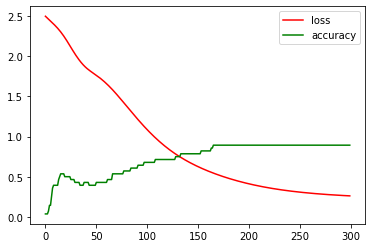

In [73]:
# 학습과정 보기
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='r', label="loss")
plt.plot(hist.history['accuracy'], color='g', label='accuracy')
plt.legend()

In [87]:
import tensorflow.keras.utils

In [94]:
# 경마장에 뒤에 나오는 단어를 model에 의해 추측
word = input("입력단어 : ")
encoded = t.texts_to_sequences([word])[0]
encoeded = pad_sequences([encoded],maxlen=5,padding='pre')
#result = model.predict(encoded) 이거뭐지
result = model.predict_classes(encoded)
print("예측결과값:", result[0])
for key, value in t.word_index.items():
    if value==result[0]:
        print("예측된단어: ",key)
        break

입력단어 : 말이
예측결과값: 4
예측된단어:  뛰고


In [90]:
# 경마장에 뒤에 나오는 단어를 model에 의해 추측
word = input("입력단어 : ")
encoded = t.texts_to_sequences([word])[0]
encoeded = pad_sequences([encoded],maxlen=5,padding='pre')
#result = model.predict(encoded) 이거뭐지
#result = model.predict_classes(encoded)
result = np.argmax(model.predict(encoded))
print("예측결과값:", result)
for key, value in t.word_index.items():
    if value==result:
        print("예측된단어: ",key)
        break

입력단어 : 말이
예측결과값: 4
예측된단어:  뛰고


# 다음 문맥 예측해보기.

In [ ]:
# '가는' 이후에 올 단어 4개 예측 => 경마장에 있는 말이 뛰고.
# _____                 _

In [110]:
def sentence_generation(model, t, current_word,n):
    init_word = current_word
    print('입력 단어 :',init_word)
    sentence=""
    for i in range(1,n+1):
        encoded = t.texts_to_sequences([current_word)[0]
        encoded = pad_sequences([encoded],maxlen=5,padding='pre')
        result = np.argmax(model.predict)
        for word, index in t.word_index.items():
            if index==result:
                print("{}번째 : {}:{}".format(i,word,result))
                current_word = current_word + ' '+word
                break;
    return current_word

In [111]:
sentence_generation(model, t,"경마장에", 4)

입력 단어 : 경마장에


'경마장에'

In [113]:
# "경마장에" 이후에 올 단어  4개 예측 => 경마장에 있는 말이 뛰고
#  -----                   --
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    print("입력 단어 :", init_word)
    setence = ""
    for i in range(1,n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = np.argmax(model.predict(encoded))
        for word, index in t.word_index.items():
            if index==result:
                print("{}번째 : {}:{}".format(i, word, result))
                current_word = current_word + ' ' + word
                break;
    return current_word

In [114]:
sentence_generation(model, t,"경마장에", 4)

입력 단어 : 경마장에
1번째 : 있는:3
2번째 : 말이:1
3번째 : 뛰고:4
4번째 : 있다:5


'경마장에 있는 말이 뛰고 있다'

# LSTM

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

# RNN 모델 생성
model = Sequential()
# 희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(LSTM(32))
model.add(Dense(vocab_size, activation="softmax"))

# 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.4851 - accuracy: 0.2500
Epoch 2/300
1/1 - 0s - loss: 2.4822 - accuracy: 0.1786
Epoch 3/300
1/1 - 0s - loss: 2.4793 - accuracy: 0.2500
Epoch 4/300
1/1 - 0s - loss: 2.4764 - accuracy: 0.2500
Epoch 5/300
1/1 - 0s - loss: 2.4735 - accuracy: 0.2857
Epoch 6/300
1/1 - 0s - loss: 2.4706 - accuracy: 0.2857
Epoch 7/300
1/1 - 0s - loss: 2.4676 - accuracy: 0.2857
Epoch 8/300
1/1 - 0s - loss: 2.4646 - accuracy: 0.2857
Epoch 9/300
1/1 - 0s - loss: 2.4615 - accuracy: 0.2857
Epoch 10/300
1/1 - 0s - loss: 2.4583 - accuracy: 0.2857
Epoch 11/300
1/1 - 0s - loss: 2.4550 - accuracy: 0.2857
Epoch 12/300
1/1 - 0s - loss: 2.4515 - accuracy: 0.2857
Epoch 13/300
1/1 - 0s - loss: 2.4480 - accuracy: 0.2857
Epoch 14/300
1/1 - 0s - loss: 2.4443 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.4405 - accuracy: 0.2857
Epoch 16/300
1/1 - 0s - loss: 2.4365 - accuracy: 0.2857
Epoch 17/300
1/1 - 0s - loss: 2.4323 - accuracy: 0.2857
Epoch 18/300
1/1 - 0s - loss: 2.4280 - accuracy: 0.2857
E

Epoch 147/300
1/1 - 0s - loss: 1.4202 - accuracy: 0.5000
Epoch 148/300
1/1 - 0s - loss: 1.4074 - accuracy: 0.5357
Epoch 149/300
1/1 - 0s - loss: 1.3945 - accuracy: 0.5357
Epoch 150/300
1/1 - 0s - loss: 1.3815 - accuracy: 0.5357
Epoch 151/300
1/1 - 0s - loss: 1.3684 - accuracy: 0.5357
Epoch 152/300
1/1 - 0s - loss: 1.3552 - accuracy: 0.5357
Epoch 153/300
1/1 - 0s - loss: 1.3418 - accuracy: 0.5357
Epoch 154/300
1/1 - 0s - loss: 1.3283 - accuracy: 0.5357
Epoch 155/300
1/1 - 0s - loss: 1.3147 - accuracy: 0.5357
Epoch 156/300
1/1 - 0s - loss: 1.3010 - accuracy: 0.5357
Epoch 157/300
1/1 - 0s - loss: 1.2872 - accuracy: 0.5357
Epoch 158/300
1/1 - 0s - loss: 1.2733 - accuracy: 0.5357
Epoch 159/300
1/1 - 0s - loss: 1.2593 - accuracy: 0.5714
Epoch 160/300
1/1 - 0s - loss: 1.2453 - accuracy: 0.6071
Epoch 161/300
1/1 - 0s - loss: 1.2312 - accuracy: 0.6071
Epoch 162/300
1/1 - 0s - loss: 1.2171 - accuracy: 0.6429
Epoch 163/300
1/1 - 0s - loss: 1.2029 - accuracy: 0.6786
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.4856 - accuracy: 0.8571
Epoch 292/300
1/1 - 0s - loss: 0.4837 - accuracy: 0.8571
Epoch 293/300
1/1 - 0s - loss: 0.4819 - accuracy: 0.8571
Epoch 294/300
1/1 - 0s - loss: 0.4800 - accuracy: 0.8571
Epoch 295/300
1/1 - 0s - loss: 0.4781 - accuracy: 0.8571
Epoch 296/300
1/1 - 0s - loss: 0.4763 - accuracy: 0.8571
Epoch 297/300
1/1 - 0s - loss: 0.4745 - accuracy: 0.8571
Epoch 298/300
1/1 - 0s - loss: 0.4727 - accuracy: 0.8571
Epoch 299/300
1/1 - 0s - loss: 0.4709 - accuracy: 0.8571
Epoch 300/300
1/1 - 0s - loss: 0.4691 - accuracy: 0.8571


In [ ]:
sentence_generation(model, t,"경마장에", 4)